In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv('task1.csv')

In [3]:
# Look at some of the top rows of the dataset
df.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


In [6]:
# We look at the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51037 entries, 0 to 51036
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOS                         51037 non-null  float64
 1   blood                       51037 non-null  float64
 2   circulatory                 51037 non-null  float64
 3   congenital                  51037 non-null  float64
 4   digestive                   51037 non-null  float64
 5   endocrine                   51037 non-null  float64
 6   genitourinary               51037 non-null  float64
 7   infectious                  51037 non-null  float64
 8   injury                      51037 non-null  float64
 9   mental                      51037 non-null  float64
 10  misc                        51037 non-null  float64
 11  muscular                    51037 non-null  float64
 12  neoplasms                   51037 non-null  float64
 13  nervous                     510

In [5]:
df.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
count,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,...,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000
mean,10.228510,0.370711,2.260007,0.077121,0.617591,1.175030,0.503968,0.308502,2.362698,0.428963,...,0.157572,0.533103,0.079060,0.056136,0.000294,0.412916,0.010052,0.232929,0.188726,0.098948
std,12.461440,0.652278,2.255679,0.357821,1.119265,1.345073,0.845481,0.670549,2.206709,0.856638,...,0.364343,0.498908,0.269835,0.230186,0.017141,0.492363,0.099753,0.422702,0.391295,0.298595
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.857639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.583333,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.805556,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Separate target and features variable
'''
LOS is the target variable
features contains independent variables
'''
LOS = df['LOS'].values
features = df.drop(columns=['LOS'])

In [9]:

# Check for any NaNs
'''
Run this code to keep rows having required percentage of non-NA column values

ratio_nonNA = 0.5
df.dropna(thresh=np.int(ratio_nonNA*(len(df.columns)/100),inplace=True)

The above code only keeps rows having atleast 50% non-NA values for columns
'''
df.isnull().values.sum()

0

In [10]:
# Split data into training and testing dataset
'''
test_size = 0.2
This means that the test data is 20% of entire dataset

random_state = 5
This means that there if shuffling of the dataset before splitting
Setting random_state is equivalent to setting a seed
This is done so that we get the same result everytime we run the notebook
'''
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 40829 samples.
Testing set has 10208 samples.


In [11]:
# Regression models for comparison
'''
models is a list containing the objects for ML algorithms.
results is a dictionary where key is algorithm name and value is MAE.
We train for each model and predict on test.
We use the ground truth and predictions to calculate MAE.
The MAE's for each model are stored in results.
'''
ml_models = [LinearRegression(),
          SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR()]

results = {}

for model in ml_models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(x_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = mean_absolute_error(y_test, y_test_preds)
    print('{} done.'.format(name))

LinearRegression done.
SGDRegressor done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.


In [12]:
print('Mean Absolute Error')
for i in results.keys():
    print('{} : {}'.format(i,results[i]))

Mean Absolute Error
LinearRegression : 6.092866831280886
SGDRegressor : 6.446881916451007
GradientBoostingRegressor : 5.587236700033559
KNeighborsRegressor : 5.8035596400426686
RandomForestRegressor : 5.7602112634131375
SVR : 5.251454298258674


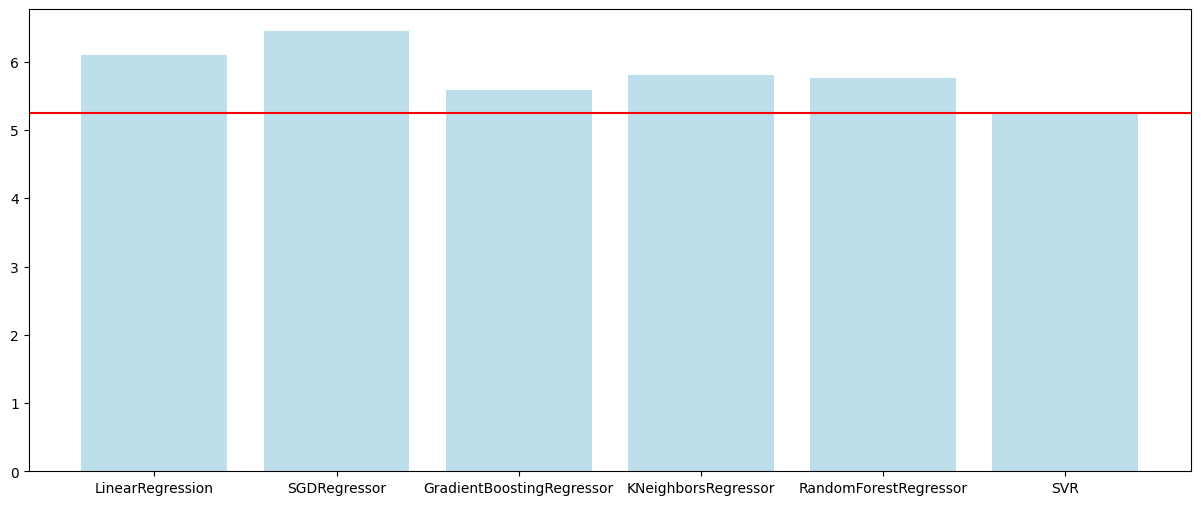

In [13]:
# Plot barplot for MAE
'''
This plot will show which model has least MAE
We get the least MAE with SVM Regression
'''
ind = range(len(results))
min_mae = min(results.values())

fig = plt.figure(figsize=(15,6))
ax = fig.subplots()
ax.bar(ind, list(results.values()), align='center', 
        color = 'lightblue', alpha=0.8)
plt.xticks(ind, results.keys())
ax.axhline(y=min_mae, xmin=0, xmax=100, ls='-', color='red')


plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:

rows = x_train.shape[0]
cols = x_train.shape[1]
input_shape = (cols,)
data_count = x_train.shape[0]
print("Number of data points:", data_count)


Number of data points: 40829


In [19]:
# Training the network
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
print(model.summary())

# FIT / TRAIN model on training daa

NumEpochs = 20
BatchSize = 8

# Compile the model and fit it on the training data
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='mean_absolute_error', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

# Predicting on the test dataset
results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and MAE")
print("results ", results)

C:\Users\gobin\Anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_10 (Dense)              │ (None, 1024)          │       50,176 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_11 (Dense)              │ (None, 1024)          │    1,049,600 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_12 (Dense)              │ (None, 1024)          │    1,049,600 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_13 (Dense)              │ (None, 1024)          │    1,049,600 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_14 (Dense)              │ (None, 1)             │        1,025 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,200,001 (12.21 MB)

 Trainable params: 3,200,001 (12.21 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 220s 42ms/step - loss: 7.3562 - mae: 5.5258 - val_loss: 6.0768 - val_mae: 5.3676
Epoch 2/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 214s 42ms/step - loss: 5.8026 - mae: 5.2123 - val_loss: 5.5830 - val_mae: 5.2330
Epoch 3/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 218s 43ms/step - loss: 5.4319 - mae: 5.1193 - val_loss: 5.5632 - val_mae: 5.3264
Epoch 4/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 212s 42ms/step - loss: 5.4444 - mae: 5.2230 - val_loss: 5.3551 - val_mae: 5.1720
Epoch 5/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 211s 41ms/step - loss: 5.2638 - mae: 5.0873 - val_loss: 5.4237 - val_mae: 5.2654
Epoch 6/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 211s 41ms/step - loss: 5.2509 - mae: 5.0985 - val_loss: 5.3573 - val_mae: 5.2162
Epoch 7/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 220s 43ms/step - loss: 5.2291 - mae: 5.0985 - val_loss: 5.3185 - val_mae: 5.1948
Epoch 9/20
5104/5104 ━━━━━━━━━━━━━━━━━━━━ 254s 41ms/step - loss: 5.0868 - mae: 4.9617 - val_loss: 5.3010 - val_mae: 5.1798
Epoch 10/20

In [24]:
first_row_train = x_train.iloc[0]
print(first_row_train)

blood                         1.0
circulatory                   2.0
congenital                    0.0
digestive                     1.0
endocrine                     3.0
genitourinary                 2.0
infectious                    0.0
injury                        3.0
mental                        0.0
misc                          0.0
muscular                      0.0
neoplasms                     0.0
nervous                       1.0
pregnancy                     0.0
prenatal                      1.0
respiratory                   0.0
skin                          0.0
GENDER                        1.0
ICU                           1.0
NICU                          0.0
ADM_ELECTIVE                  0.0
ADM_EMERGENCY                 1.0
ADM_NEWBORN                   0.0
ADM_URGENT                    0.0
INS_Government                0.0
INS_Medicaid                  0.0
INS_Medicare                  1.0
INS_Private                   0.0
INS_Self Pay                  0.0
REL_NOT SPECIF

In [48]:
# Gender Input
gender_input = input("Enter gender (male/female): ")
gender = 1 if gender_input.lower() == "female" else 0
print(gender)
# Age Input
age = int(input("Enter age: "))
age_newborn = 1 if age <= 14 else 0
age_young_adult = 1 if 14 < age <= 34 else 0
age_middle_adult = 1 if 34 < age <= 50 else 0
age_senior = 1 if age > 50 else 0
print(age_newborn,age_young_adult,age_middle_adult,age_senior)
# ICU/NICU Input
icu_input = input("ICU or NICU? ")
icu = 1 if icu_input.lower() == "icu" else 0
nicu = 1 if icu_input.lower() == "nicu" else 0

# Admission Input
admission_input = input("Admission type (elective/emergency/newborn/urgent): ").lower()
admission = {
    "ADM_ELECTIVE": 1 if admission_input == "elective" else 0,
    "ADM_EMERGENCY": 1 if admission_input == "emergency" else 0,
    "ADM_NEWBORN": 1 if admission_input == "newborn" else 0,
    "ADM_URGENT": 1 if admission_input == "urgent" else 0
}

print(admission)
# Insurance Input
insurance_input = input("Insurance type (government/medicaid/medicare/private/selfpay): ").lower()
insurance = {
    "INS_Government": 1 if insurance_input == "government" else 0,
    "INS_Medicaid": 1 if insurance_input == "medicaid" else 0,
    "INS_Medicare": 1 if insurance_input == "medicare" else 0,
    "INS_Private": 1 if insurance_input == "private" else 0,
    "INS_Self Pay": 1 if insurance_input == "selfpay" else 0
}
print(insurance)
# Religion Input
religion_input = input("Religion type (not specified/religious/unobtainable): ").lower()
religion_columns = {
    "REL_NOT SPECIFIED": 1 if religion_input == "not specified" else 0,
    "REL_RELIGIOUS": 1 if religion_input == "religious" else 0,
    "REL_UNOBTAINABLE": 1 if religion_input == "unobtainable" else 0
}
print(religion_columns)
# Ethnicity Input
ethnicity_input = input("Ethnicity type (asian/black/african american/hispanic/latino/other/unknown/white): ").lower()
ethnicity_columns = {
    "ETH_ASIAN": 1 if "asian" in ethnicity_input else 0,
    "ETH_BLACK/AFRICAN AMERICAN": 1 if "black" in ethnicity_input or "african american" in ethnicity_input else 0,
    "ETH_HISPANIC/LATINO": 1 if "hispanic" in ethnicity_input or "latino" in ethnicity_input else 0,
    "ETH_OTHER/UNKNOWN": 1 if "other" in ethnicity_input or "unknown" in ethnicity_input else 0,
    "ETH_WHITE": 1 if "white" in ethnicity_input else 0
}
print(ethnicity_columns)

# Marital Status Input
marital_status_input = input("Marital status (divorced/life partner/married/separated/single/unknown (default)/widowed): ").lower()
marital_status_columns = {
    "MAR_DIVORCED": 1 if "divorced" in marital_status_input else 0,
    "MAR_LIFE PARTNER": 1 if "life partner" in marital_status_input else 0,
    "MAR_MARRIED": 1 if "married" in marital_status_input else 0,
    "MAR_SEPARATED": 1 if "separated" in marital_status_input else 0,
    "MAR_SINGLE": 1 if "single" in marital_status_input else 0,
    "MAR_UNKNOWN (DEFAULT)": 1 if "unknown" in marital_status_input else 0,
    "MAR_WIDOWED": 1 if "widowed" in marital_status_input else 0
}
print(marital_status_columns)
# Creating DataFrame with user inputs
user_data = pd.DataFrame({
    "GENDER": gender,
    "AGE_newborn": age_newborn,
    "AGE_young_adult": age_young_adult,
    "AGE_middle_adult": age_middle_adult,
    "AGE_senior": age_senior,
    "ICU": icu,
    "NICU": nicu,
    **admission,
    **insurance,
    **religion_columns,
    **ethnicity_columns,
    **marital_status_columns 
}, index=[0])
# Define a dictionary to store column names and their corresponding input prompts
column_prompts = {
    "blood": "Blood column value: ",
    "circulatory": "Circulatory column value: ",
    "congenital": "Congenital column value: ",
    "digestive": "Digestive column value: ",
    "endocrine": "Endocrine column value: ",
    "genitourinary": "Genitourinary column value: ",
    "infectious": "Infectious column value: ",
    "injury": "Injury column value: ",
    "mental": "Mental column value: ",
    "misc": "Misc column value: ",
    "muscular": "Muscular column value: ",
    "neoplasms": "Neoplasms column value: ",
    "nervous": "Nervous column value: ",
    "pregnancy": "Pregnancy column value: ",
    "prenatal": "Prenatal column value: ",
    "respiratory": "Respiratory column value: ",
    "skin": "Skin column value: "
}

# Initialize an empty dictionary to store user inputs
column_values = {}

# Iterate over each column prompt and get user input
for column, prompt in column_prompts.items():
    column_values[column] = float(input(prompt))

# Convert the dictionary of column values to a DataFrame
user_data_columns = pd.DataFrame(column_values, index=[0])

# Concatenate the user_data_columns DataFrame with the existing user_data DataFrame
user_data = pd.concat([user_data, user_data_columns], axis=1)

# Now you can use this `user_data` DataFrame along with your existing data.
print(user_data)


Enter gender (male/female):  male


0


Enter age:  23


0 1 0 0


ICU or NICU?  ICU
Admission type (elective/emergency/newborn/urgent):  elective


{'ADM_ELECTIVE': 1, 'ADM_EMERGENCY': 0, 'ADM_NEWBORN': 0, 'ADM_URGENT': 0}


Insurance type (government/medicaid/medicare/private/selfpay):  government


{'INS_Government': 1, 'INS_Medicaid': 0, 'INS_Medicare': 0, 'INS_Private': 0, 'INS_Self Pay': 0}


Religion type (not specified/religious/unobtainable):  not specified


{'REL_NOT SPECIFIED': 1, 'REL_RELIGIOUS': 0, 'REL_UNOBTAINABLE': 0}


Ethnicity type (asian/black/african american/hispanic/latino/other/unknown/white):  asian


{'ETH_ASIAN': 1, 'ETH_BLACK/AFRICAN AMERICAN': 0, 'ETH_HISPANIC/LATINO': 0, 'ETH_OTHER/UNKNOWN': 0, 'ETH_WHITE': 0}


Marital status (divorced/life partner/married/separated/single/unknown (default)/widowed):  divorced


{'MAR_DIVORCED': 1, 'MAR_LIFE PARTNER': 0, 'MAR_MARRIED': 0, 'MAR_SEPARATED': 0, 'MAR_SINGLE': 0, 'MAR_UNKNOWN (DEFAULT)': 0, 'MAR_WIDOWED': 0}


Blood column value:  0
Circulatory column value:  1
Congenital column value:  2
Digestive column value:  0
Endocrine column value:  0
Genitourinary column value:  0
Infectious column value:  1
Injury column value:  0
Mental column value:  0
Misc column value:  1
Muscular column value:  0
Neoplasms column value:  1
Nervous column value:  0
Pregnancy column value:  1
Prenatal column value:  2
Respiratory column value:  1
Skin column value:  1


   GENDER  AGE_newborn  AGE_young_adult  AGE_middle_adult  AGE_senior  ICU  \
0       0            0                1                 0           0    1   

   NICU  ADM_ELECTIVE  ADM_EMERGENCY  ADM_NEWBORN  ...  injury  mental  misc  \
0     0             1              0            0  ...     0.0     0.0   1.0   

   muscular  neoplasms  nervous  pregnancy  prenatal  respiratory  skin  
0       0.0        1.0      0.0        1.0       2.0          1.0   1.0  

[1 rows x 48 columns]


In [50]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'model1.pkl')

['model.pkl']

In [45]:
predictions = model.predict(user_data)

# Print the predictions
print("Predicted LOS (Length of Stay):", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted LOS (Length of Stay): [[2.620944]]


In [47]:

from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_test_preds)

print("R2 Score:", r2)



R2 Score: 0.33207824458666224
